In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Load dataset
df = pd.read_csv("Sales_Transactions_Dataset_Weekly.csv")

In [3]:
# Display basic info
display(df.head())
print(df.info())
print("Columns in dataset:", df.columns)

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.1+ KB
None
Columns in dataset: Index(['Product_Code', 'W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8',
       ...
       'Normalized 42', 'Normalized 43', 'Normalized 44', 'Normalized 45',
       'Normalized 46', 'Normalized 47', 'Normalized 48', 'Normalized 49',
       'Normalized 50', 'Normalized 51'],
      dtype='object', length=107)


In [4]:
# Extract weekly sales columns
weekly_columns = [col for col in df.columns if col.startswith("W")]
normalized_columns = [col for col in df.columns if col.startswith("Normalised")]

In [5]:
# Aggregate sales over the 52 weeks
df["Total_Sales"] = df[weekly_columns].sum(axis=1)
df["Average_Sales"] = df[weekly_columns].mean(axis=1)

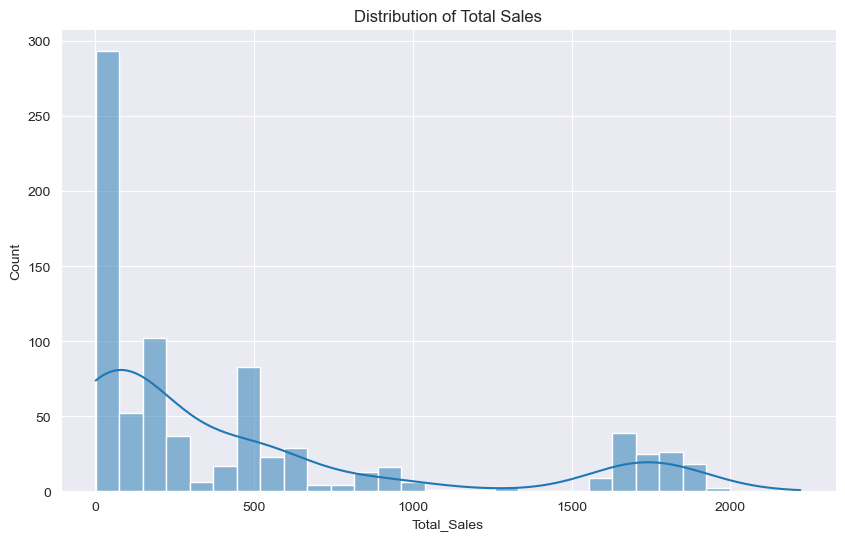

In [6]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df["Total_Sales"], bins=30, kde=True)
plt.title("Distribution of Total Sales")
plt.show()

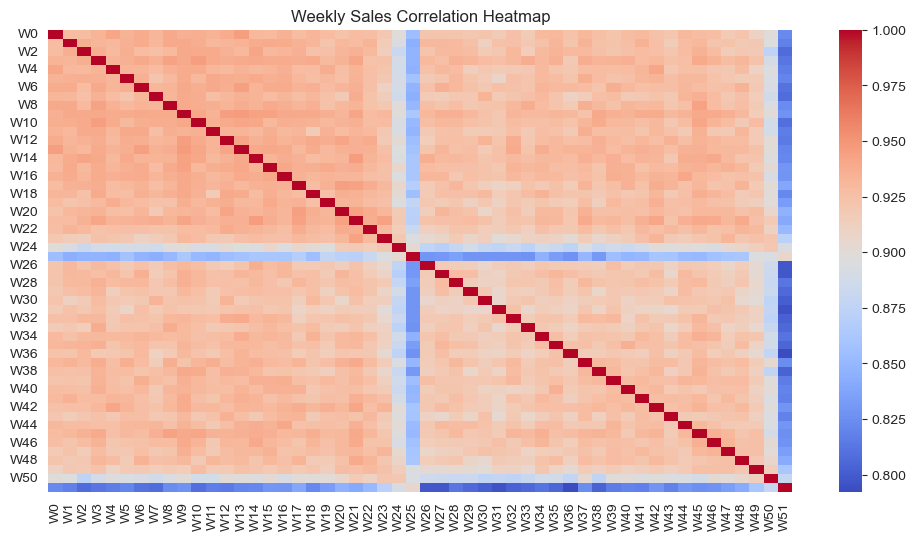

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[weekly_columns].corr(), cmap="coolwarm")
plt.title("Weekly Sales Correlation Heatmap")
plt.show()

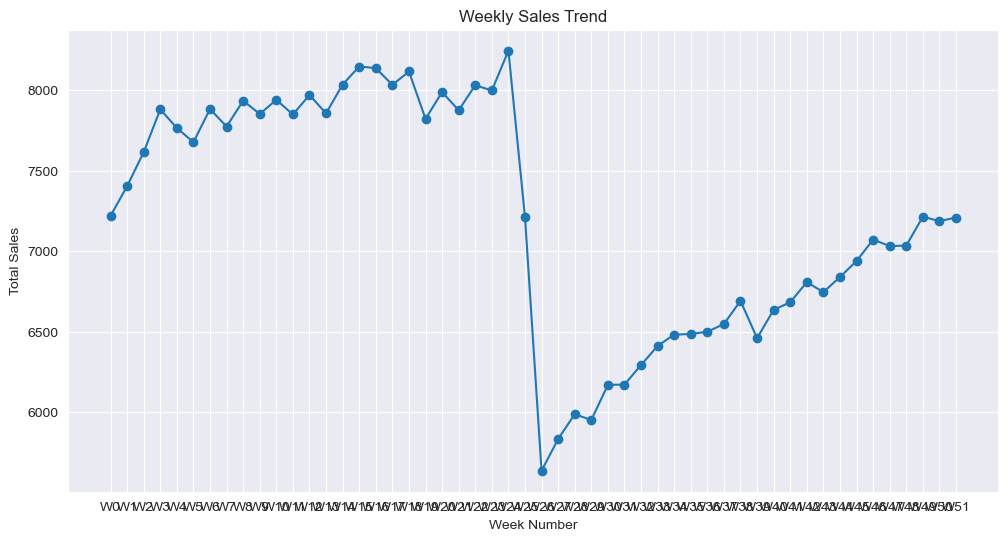

In [8]:
# Time Series Analysis
weekly_sales_trend = df[weekly_columns].sum()
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales_trend, marker='o')
plt.title("Weekly Sales Trend")
plt.xlabel("Week Number")
plt.ylabel("Total Sales")
plt.show()

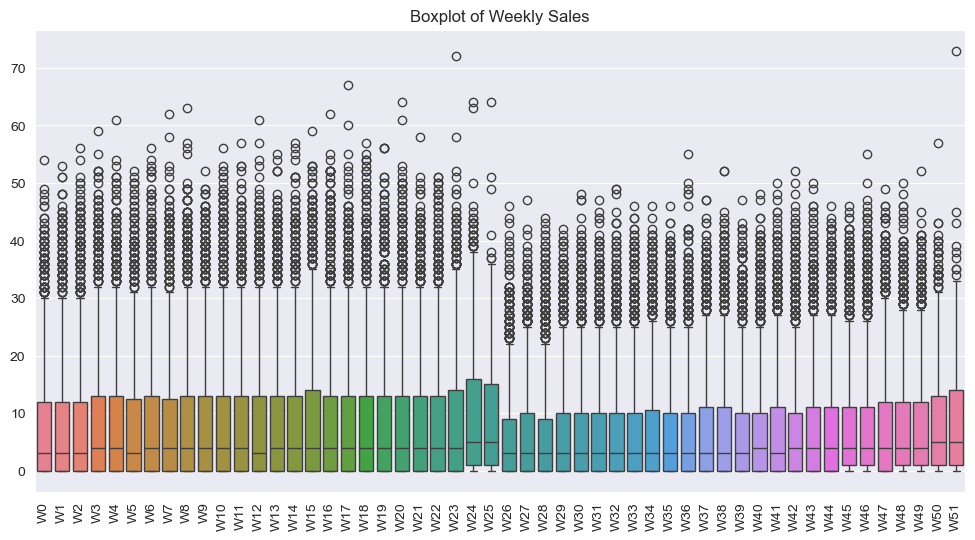

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[weekly_columns])
plt.title("Boxplot of Weekly Sales")
plt.xticks(rotation=90)
plt.show()

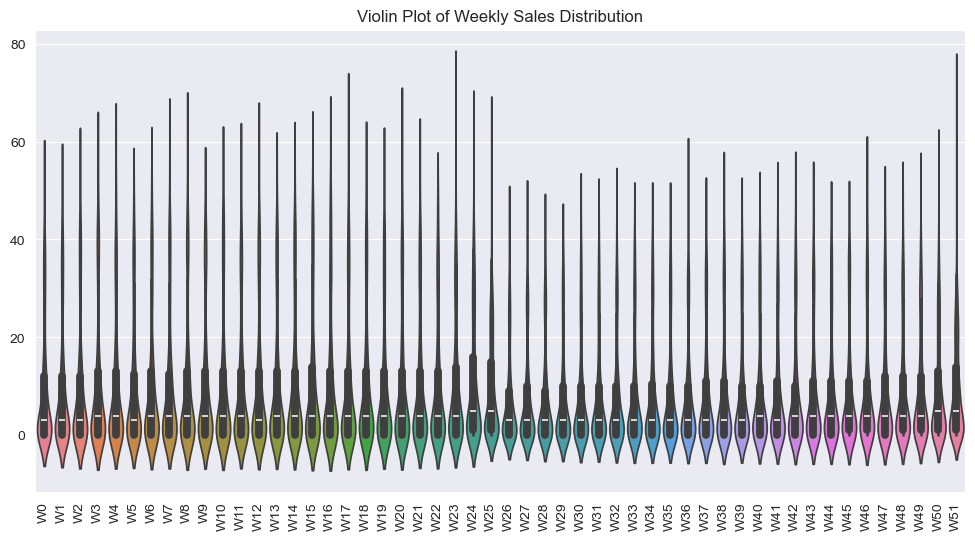

In [10]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[weekly_columns])
plt.title("Violin Plot of Weekly Sales Distribution")
plt.xticks(rotation=90)
plt.show()

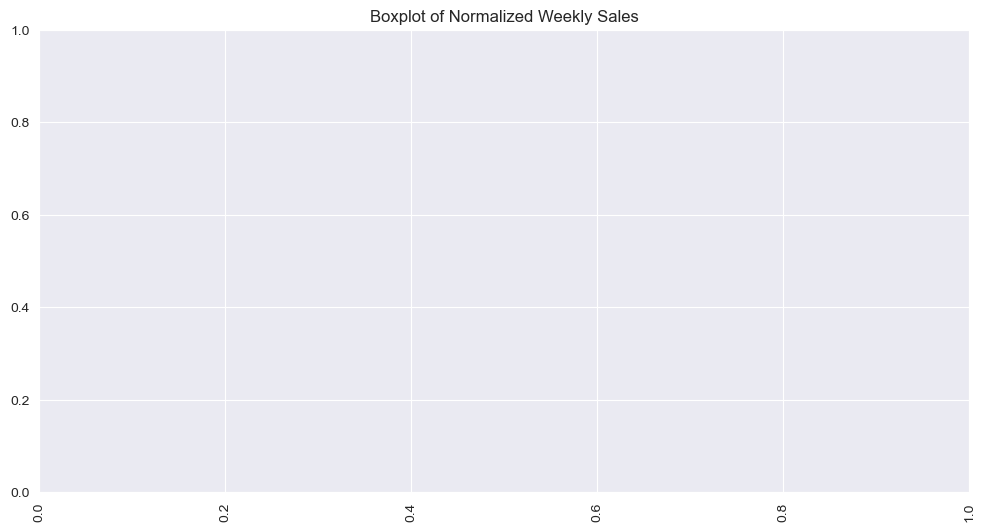

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[normalized_columns])
plt.title("Boxplot of Normalized Weekly Sales")
plt.xticks(rotation=90)
plt.show()

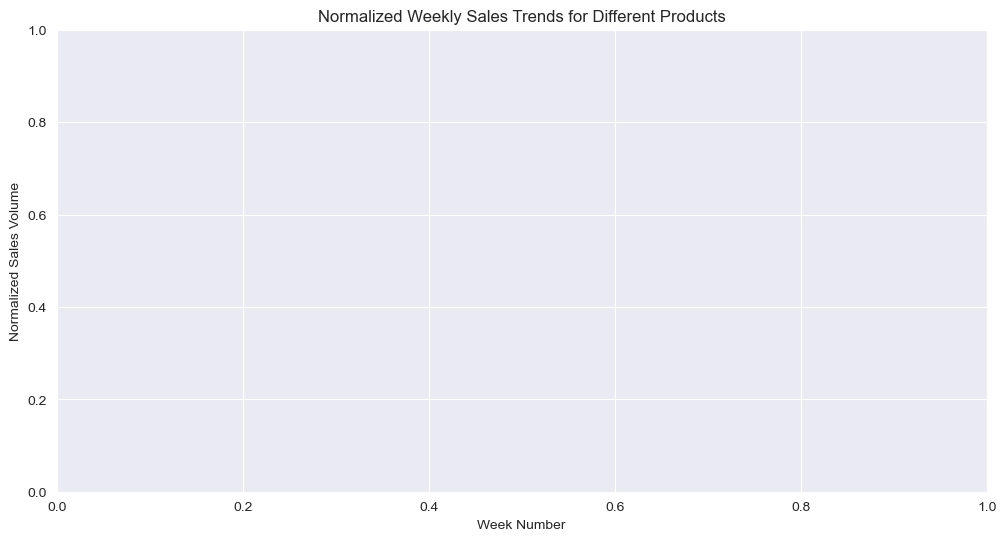

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[normalized_columns].T)
plt.title("Normalized Weekly Sales Trends for Different Products")
plt.xlabel("Week Number")
plt.ylabel("Normalized Sales Volume")
plt.show()

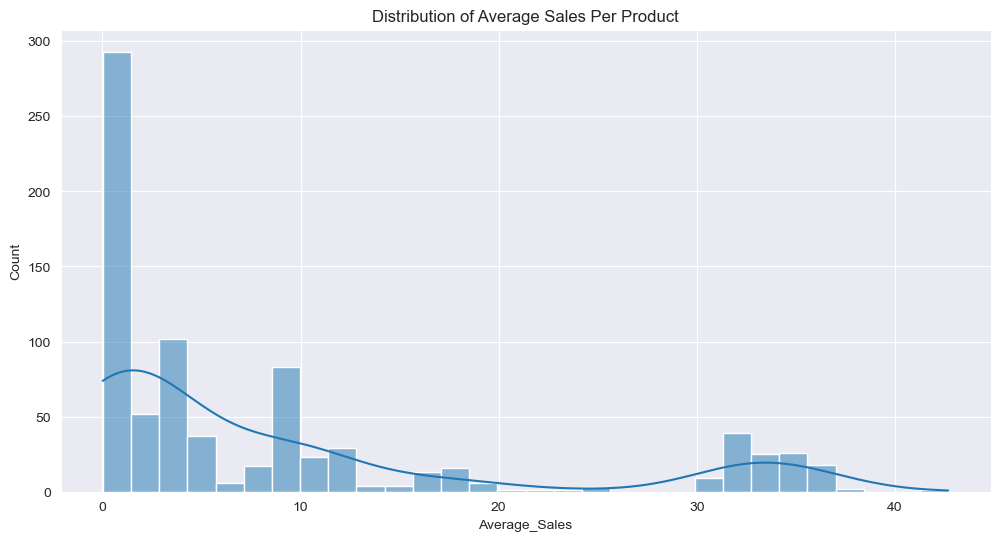

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Average_Sales"], bins=30, kde=True)
plt.title("Distribution of Average Sales Per Product")
plt.show()

In [14]:
# Define target and features
target = "Total_Sales"
features = weekly_columns + normalized_columns
X = df[features]
y = df[target]

In [15]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

In [17]:
# Dictionaries to store evaluation metrics
mae_values = {}
rmse_values = {}
r2_values = {}

# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store evaluation metrics
    mae_values[name] = mean_absolute_error(y_test, y_pred)
    rmse_values[name] = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_values[name] = r2_score(y_test, y_pred)
    
    # Print evaluation metrics
    print(f"{name} Results:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R^2 Score:", r2_score(y_test, y_pred))
    print("---" * 10)

Linear Regression Results:
MAE: 1.7407479684018435e-13
RMSE: 2.5233825788697046e-13
R^2 Score: 1.0
------------------------------
Random Forest Results:
MAE: 21.099263803680984
RMSE: 32.82629852491179
R^2 Score: 0.9966191999298025
------------------------------
Gradient Boosting Results:
MAE: 23.9422554780873
RMSE: 41.806133747686886
R^2 Score: 0.9945165274895462
------------------------------
XGBoost Results:
MAE: 31.743770514894848
RMSE: 66.9311968865947
R^2 Score: 0.9859449355343864
------------------------------


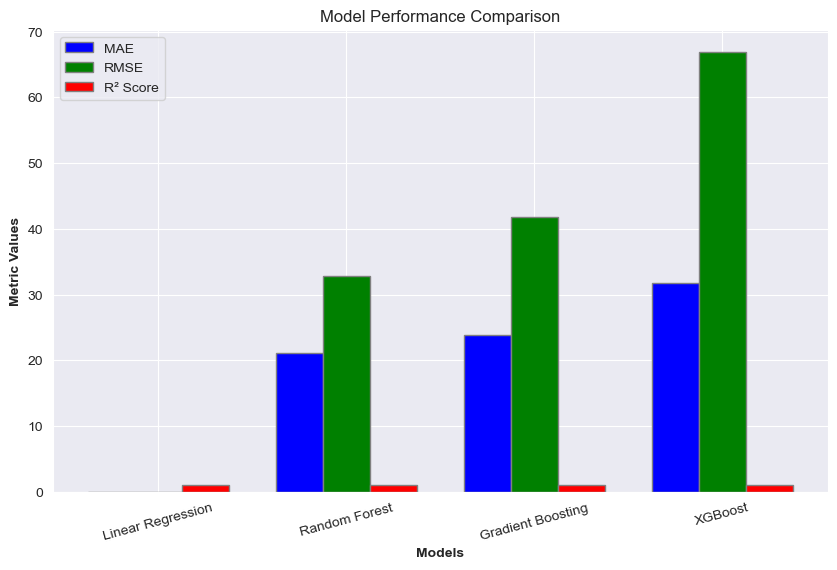

In [18]:
# Convert metrics to lists for plotting
model_names = list(models.keys())
mae_list = [mae_values[name] for name in model_names]
rmse_list = [rmse_values[name] for name in model_names]
r2_list = [r2_values[name] for name in model_names]

# Define bar width and positions
bar_width = 0.25
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, mae_list, color='b', width=bar_width, edgecolor='grey', label='MAE')
plt.bar(r2, rmse_list, color='g', width=bar_width, edgecolor='grey', label='RMSE')
plt.bar(r3, r2_list, color='r', width=bar_width, edgecolor='grey', label='R² Score')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Metric Values', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(model_names))], model_names, rotation=15)
plt.legend()
plt.title('Model Performance Comparison')

# Show the chart
plt.show()

In [19]:
# Time Series Forecasting (ARIMA)
ts_data = weekly_sales_trend.values
model_arima = ARIMA(ts_data, order=(5,1,0))
model_fit = model_arima.fit()
forecast = model_fit.forecast(steps=10)

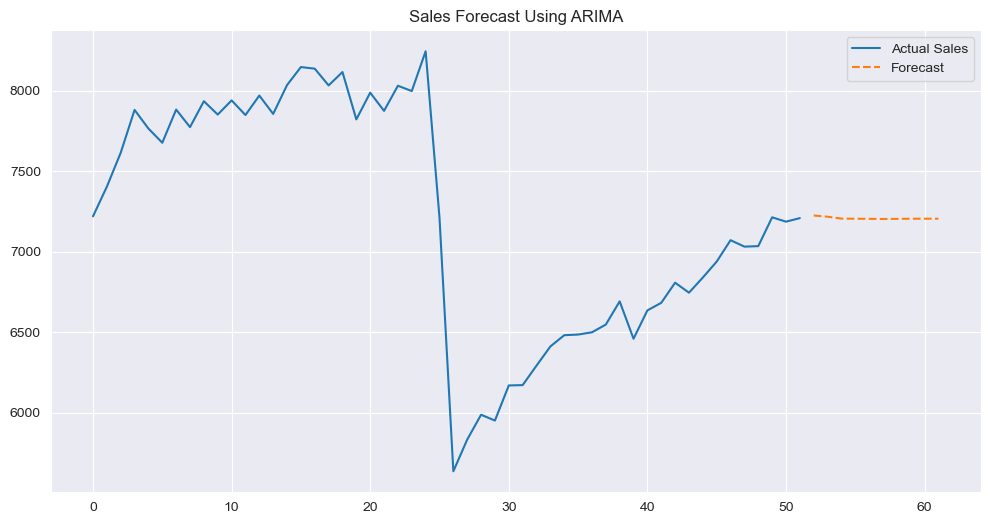

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(ts_data)), ts_data, label="Actual Sales")
plt.plot(range(len(ts_data), len(ts_data) + 10), forecast, label="Forecast", linestyle='dashed')
plt.legend()
plt.title("Sales Forecast Using ARIMA")
plt.show()